# 특성공학(Feature Engineering)
- 범주형 데이터의 머신러닝
- 가변수 생성하기 = 원-핫-인코딩(One-Hot-Encoding)
- 원-핫-인코딩(OHE): 각 독립변수를 가지고 있는 요소의 종류로 다시 분할하여 해당 요소가 있는지 없는지만을 0과 1로 구분한 숫자로 변환하는 것이다.
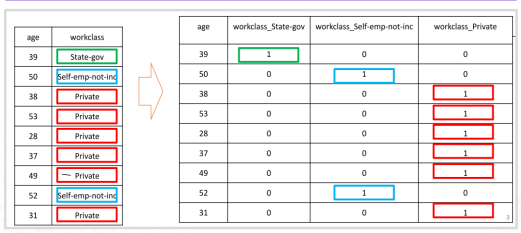  
ex) 미국 성인들의 특성들을 고려하여 소득수준(연 50,000달러 이상/이하 2개의 클래스)을 예측하고자 한다.
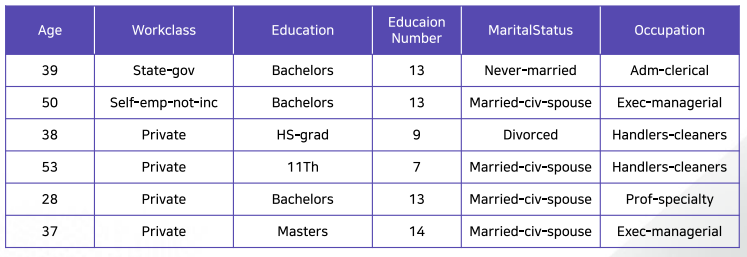
- 숫자로 표현된 범주형: 숫자라고 해서 반드시 범주형인 것은 아님. 단순히 up/down만 존재하는 연속형 데이터보다 숫자라도 범주형으로 처리할 경우 오히려 유용한 정보를 가지는 경우가 많음  
ex) 나이:10대, 20대 등 연령대로 나눌 수 있음 / 상품코드: 상품이름보다 샘플을 코드화하여 숫자로 표현함
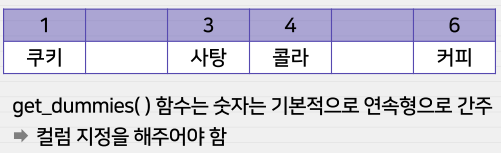

In [24]:
#모든 결과물 한꺼번에 display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity= "all"

# 필요한 모듈 로드하기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 구글드라이브에서 현재 작업중인 코드로 데이터 불러오기
import pandas as pd
data = pd.read_csv('E:\\py_temp\\MachineLearning\\adult.csv')

# 데이터셋의 정보를 파악한다
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1   workclass        32561 non-null  object
 2   education        32561 non-null  object
 3   educationNumber  32561 non-null  int64 
 4   maritalStatus    32561 non-null  object
 5   occupation       32561 non-null  object
 6   relationship     32561 non-null  object
 7   race             32561 non-null  object
 8   gender           32561 non-null  object
 9   hourPerWeek      32561 non-null  int64 
 10  nativeCountry    32561 non-null  object
 11  income           32561 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [25]:
# 컬럼 이름(header) 확인
print(data.columns.values)

['age' 'workclass' 'education' 'educationNumber' 'maritalStatus'
 'occupation' 'relationship' 'race' 'gender' 'hourPerWeek' 'nativeCountry'
 'income']


### 7-1. 더미변수 생성 없이 가능한 데이터만 가지고 분석
: 연속형 변수만 분석에 활용할 수 있기 때문에 '연령', '교육연수', '주당 노동시간' 3개 변수만 가지고 분석을 실시한다

In [26]:
# 특성 설정
X = data.loc[:,['age','educationNumber','hourPerWeek']] # 독립변수 3가지 직접 지정
print(X.head())

# 출력변수 y 할당
y = data.loc[:, 'income']
print(y.head())

print('X.shape:', X.shape, 'y.shape:', y.shape)

   age  educationNumber  hourPerWeek
0   39               13           40
1   50               13           13
2   38                9           40
3   53                7           40
4   28               13           40
0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: income, dtype: object
X.shape: (32561, 3) y.shape: (32561,)


> LogisticRegression(solver="solver"): solver는 어떤 방법으로 모델을 해결할지 결정하는 것  
    - *** 기본 값은 'lbfgs'이며 L2 규제만 적용되기에, L1 규제 적용 시 'liblinear' 사용 *** (나머지는 비슷해서 잘 사용하지 X)  
    - lbfgs: default 값. 다중 클래스 문제의 경우 다항 손실 처리. L2를 처리하거나 패널티 없음.  
    - liblinear: 작은 데이터 활용 시 용이. 일대일 방식으로 제한. L1 처리. 페널티 없음을 지원하지 않음.  
    - newton-cg: 다중 클래스 문제의 경우 다항 손실 처리. L2를 처리하거나 패널티 없음.  
    - sag: 큰 데이터 활용 시 용이. 다중 클래스 문제의 경우 다항 손실 처리. L2를 처리하거나 패널티 없음.  
    - saga: 큰 데이터 활용 시 용이. 다중 클래스 문제의 경우 다항 손실 처리. L1, L2를 처리하거나 패널티 없음.  
    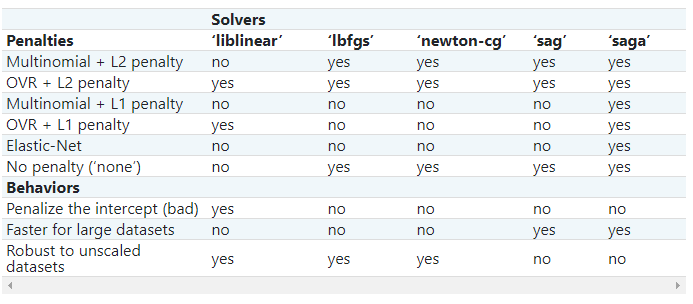

In [27]:
# 훈련데이터와 테스트데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 로짓 모델 설정
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver="liblinear")

# 설정한 모델로 학습
logreg.fit(X_train, y_train)

# 학습결과 출력
print("훈련점수:", logreg.score(X_train, y_train))
print("테스트 점수:", logreg.score(X_test, y_test))

LogisticRegression(solver='liblinear')

훈련점수: 0.7900900900900901
테스트 점수: 0.7850386930352536


#### 원 핫 엔코딩 수행해서 분류 분석

In [28]:
# 특성 설정
X = data.loc[:,'age':'nativeCountry' ]
print(X.head())

   age          workclass   education  educationNumber        maritalStatus  \
0   39          State-gov   Bachelors               13        Never-married   
1   50   Self-emp-not-inc   Bachelors               13   Married-civ-spouse   
2   38            Private     HS-grad                9             Divorced   
3   53            Private        11th                7   Married-civ-spouse   
4   28            Private   Bachelors               13   Married-civ-spouse   

           occupation    relationship    race   gender  hourPerWeek  \
0        Adm-clerical   Not-in-family   White     Male           40   
1     Exec-managerial         Husband   White     Male           13   
2   Handlers-cleaners   Not-in-family   White     Male           40   
3   Handlers-cleaners         Husband   Black     Male           40   
4      Prof-specialty            Wife   Black   Female           40   

    nativeCountry  
0   United-States  
1   United-States  
2   United-States  
3   United-States 

> pg.get_dummies(): 모든 데이터를 수치로 변환한 후, 가변수(숫자 사이의 관계성이 없음을 선언)로 전환
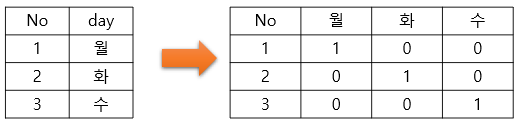

In [10]:
# 원-핫-엔코딩을 수행한다
# pd.get_dummies 함수에 입력값 X를 넣어 준다
X = pd.get_dummies(X)
# 결과 확인
print(X.head())

# 결과 : 기존 11개의 특성수가 105개로 늘어났다

   age  educationNumber  hourPerWeek  workclass_ ?  workclass_ Federal-gov  \
0   39               13           40             0                       0   
1   50               13           13             0                       0   
2   38                9           40             0                       0   
3   53                7           40             0                       0   
4   28               13           40             0                       0   

   workclass_ Local-gov  workclass_ Never-worked  workclass_ Private  \
0                     0                        0                   0   
1                     0                        0                   0   
2                     0                        0                   1   
3                     0                        0                   1   
4                     0                        0                   1   

   workclass_ Self-emp-inc  workclass_ Self-emp-not-inc  ...  \
0                        0        

In [11]:
# 출력변수 y 할당
y = data.loc[:, 'income']
print(y.head())

print('X.shape:', X.shape, 'y.shape:', y.shape)

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: income, dtype: object
X.shape: (32561, 105) y.shape: (32561,)


In [12]:
# 훈련데이터와 테스트데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [13]:
# 로짓 모델 설정
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver="liblinear")

# 설정한 모델로 학습
logreg.fit(X_train, y_train)

# 학습결과 출력
print()
print("훈련점수:", logreg.score(X_train, y_train))
print("테스트 점수:", logreg.score(X_test, y_test))

# 테스트 점수가 78.5점에서 83.3점으로 증가한 것을 볼 수 있다

LogisticRegression(solver='liblinear')


훈련점수: 0.8382882882882883
테스트 점수: 0.8325758506326004


## 특성 선택(Feature Selection)
- 칼럼, 즉 특성이 너무 많으면 모델이 복잡해지고, 과대적합 가능성이 증가
- 주성분 분석과는 달리 변환 없이 주요 특성만 추출할 수 있음
- 변환 없이 주요 특성을 추출하면 어떤 독립변수가 중요한 변수인지 직관적으로 파악 가능
- 선택한 칼럼에 대한 사전 지식이 부족할 때 매우 유용함
- 중요한 통계적 관계 여부 계산
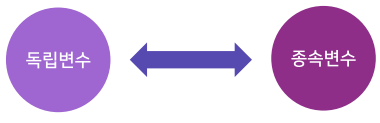
- 분류 상황에서 '분산 분석'을 사용하며, 회귀 상황에서는 '상관계수'를 분석함
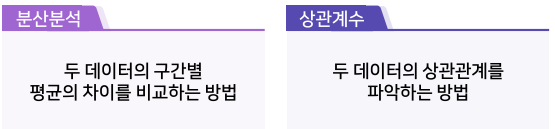
- 특성 선택의 2가지 목적: 1) 결과의 해석 2) 과대적합 해소
- 특성 변수의 수를 줄이게 되면?
  - 정확도 감소
  - 변수 100개를 30개로 줄이고 정확도가 몇% 떨어지지 않는다면 실보다 득이 많음
  - 모델의 성능과 과적합 설명의 용이성 등이 trade-off 관계는 자주 발생하는 상황임
  - 분석가는 상황에 맞게 적절한 선택을 할 필요가 있음

In [16]:
# STEP 5. 모델의 현실 적용.
# 기존에 학습한 모델을 새로운 데이터에 적용 해 본다.
# adult_test.csv <- 미지의 데이터

# 필요한 모듈 로드하기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 구글드라이브에서 현재 작업중인 코드로 데이터 불러오기
import pandas as pd
newdata = pd.read_csv('E:\\py_temp\\MachineLearning\\adult_test.csv')

# 데이터셋의 정보를 파악한다
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              5 non-null      int64 
 1   workclass        5 non-null      object
 2   education        5 non-null      object
 3   educationNumber  5 non-null      int64 
 4   maritalStatus    5 non-null      object
 5   occupation       5 non-null      object
 6   relationship     5 non-null      object
 7   race             5 non-null      object
 8   gender           5 non-null      object
 9   hourPerWeek      5 non-null      int64 
 10  nativeCountry    5 non-null      object
 11  income           5 non-null      object
dtypes: int64(3), object(9)
memory usage: 608.0+ bytes


In [17]:
# 데이터를 살펴본다
newdata.info()

# adult.csv 와 동일한 특성값에 샘플이 5개 있는것을 확인할 수 있다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              5 non-null      int64 
 1   workclass        5 non-null      object
 2   education        5 non-null      object
 3   educationNumber  5 non-null      int64 
 4   maritalStatus    5 non-null      object
 5   occupation       5 non-null      object
 6   relationship     5 non-null      object
 7   race             5 non-null      object
 8   gender           5 non-null      object
 9   hourPerWeek      5 non-null      int64 
 10  nativeCountry    5 non-null      object
 11  income           5 non-null      object
dtypes: int64(3), object(9)
memory usage: 608.0+ bytes


In [18]:
# 데이터를 살펴본다
newdata.head()

,age,workclass,education,educationNumber,maritalStatus,occupation,relationship,race,gender,hourPerWeek,nativeCountry,income
0,37,Private,Assoc-acdm,12,Divorced,Tech-support,Not-in-family,White,Female,40,United-States,<=50K
1,43,Self-emp-not-inc,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,50,United-States,<=50K
2,32,Private,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,40,United-States,<=50K
3,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
4,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,>50K


In [42]:
# adult.csv 와 마찬가지로 one-hot-encoding을 수행해 준다
newdata_X = newdata.loc[:, 'age' : 'nativeCountry']
newdata_X = pd.get_dummies(newdata_X)
newdata_X

,age,educationNumber,hourPerWeek,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,education_ 10th,education_ Assoc-acdm,education_ HS-grad,education_ Some-college,...,occupation_ Handlers-cleaners,occupation_ Tech-support,relationship_ Husband,relationship_ Not-in-family,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ White,gender_ Female,gender_ Male,nativeCountry_ United-States
0,37,12,40,1,0,0,0,1,0,0,...,0,1,0,1,0,0,1,1,0,1
1,43,10,50,0,0,1,0,0,0,1,...,0,0,1,0,0,0,1,0,1,1
2,32,6,40,1,0,0,1,0,0,0,...,1,0,1,0,0,1,0,0,1,1
3,27,12,38,1,0,0,0,1,0,0,...,0,1,0,0,1,0,1,1,0,1
4,52,9,40,0,1,0,0,0,1,0,...,0,0,0,0,1,0,1,1,0,1


In [21]:
print('newdata_X.shape:', newdata_X.shape)

newdata_X.shape: (5, 24)


> 앞에서 수행한 훈련데이터에 대한 원-핫-인코딩의 결과는 컬럼의 수가 105개였다.  
    그러나 새로운 데이터는 각 컬럼에 들어 있는 구성요소의 수가 적어 컬럼이 24개만 만들어졌다  
    따라서 훈련데이터와 새로운 데이터는 원-핫-인코딩의 결과가 달라 모델을 적용할 수 없다

In [37]:
## 기존에 사용했던 원데이터를 불러온다
# 훈련데이터에서 사용된 독립변수
# (32561, 11) 32561 행이 있다
data = pd.read_csv('E:\\py_temp\\MachineLearning\\adult.csv')
data_X = data.loc[:, 'age' : 'nativeCountry']
print('data_X.shape:', data_X.shape)

data_X.shape: (32561, 11)


In [38]:
## new데이터를 불러온다
newdata = pd.read_csv('E:\\py_temp\\MachineLearning\\adult_test.csv')
newdata_X = newdata.loc[:, 'age' : 'nativeCountry']
print('newdata_X.shape:', newdata_X.shape)

newdata_X.shape: (5, 11)


In [39]:
## new 데이터에 기존 데이터를 붙인다
# (32566, 11) 두 데이터가 결합된 32561+ 5 = 32566 행
data_appended = newdata_X.append(data_X)
print('data_appended.shape:', data_appended.shape)

data_appended.shape: (32566, 11)


In [40]:
# 결합된 데이터에 대하여 원-핫-인코딩
# (32566, 105). 모델에서 사용한 컬럼의 수와 같음
data_appended = pd.get_dummies(data_appended)
print('data_append.shape:', data_appended.shape)

# 이렇게 함으로써 원본데이터 기준 one-hot-encoding이 새로운 데이터에도 적용 된다

data_append.shape: (32566, 105)


In [41]:
# 새로운 데이터 부분인 첫 5열만 다시 잘라낸다
# 이제 새로운 데이터를 기준으로 모델 적용 및 예측이 가능하다
newdata_X = data_appended.iloc[0:5,:]

# 앞서 훈련한 모델을 이용해서 새로운 데이터(newdata_X)를 예측해 본다
print('prediction:', logreg.predict(newdata_X))
print(newdata)

c:\users\administrator\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- education_ 10th
- education_ 11th
- education_ 12th
- education_ 1st-4th
- education_ 5th-6th
- ...
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: X has 105 features, but LogisticRegression is expecting 3 features as input.

#### 연속형 변수의 범주화

In [36]:
# 연령 범주화
# pd.cut() 함수를 사용해서 연령을 나누는 기준을 설정해 준다
# bin = 나이를 나누는 기준
# label 범주화 한 범주의 이름
X["age_cut"] = pd.cut(X.age, bins=[20,30,40,50,60,80], labels=['20s','30s','40s','50s','60s'])
print(X["age_cut"])
X = pd.get_dummies(X)
print(X.shape)

# 교육 햇수 범주화
X["edu_cut"] = pd.cut(X.educationNumber, bins=[4,8,10,12,15,20], labels=['elem','high','uni','ma','Phd'])
print(X["edu_cut"])

X = pd.get_dummies(X)
print(X.shape)

0        30s
1        40s
2        30s
3        50s
4        20s
        ... 
32556    20s
32557    30s
32558    50s
32559    20s
32560    50s
Name: age_cut, Length: 32561, dtype: category
Categories (5, object): ['20s' < '30s' < '40s' < '50s' < '60s']
(32561, 110)
0          ma
1          ma
2        high
3        elem
4          ma
         ... 
32556     uni
32557    high
32558    high
32559    high
32560    high
Name: edu_cut, Length: 32561, dtype: category
Categories (5, object): ['elem' < 'high' < 'uni' < 'ma' < 'Phd']
(32561, 115)


In [ ]:
①②③④⑤⑥⑦⑧⑨⑩ λ